<a href="https://colab.research.google.com/github/R-SIBE/Introduction-to-ML/blob/master/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(cancer['data'], cancer['target'], random_state = 0)
tree = DecisionTreeClassifier(max_depth= 3)
tree.fit(X_train,y_train)
print("Training set Accuracy: {:3f}".format(tree.score(X_train,y_train)))
print("Test set accuracy: {:3f}".format(tree.score(X_test,y_test)))

Training set Accuracy: 0.976526
Test set accuracy: 0.916084


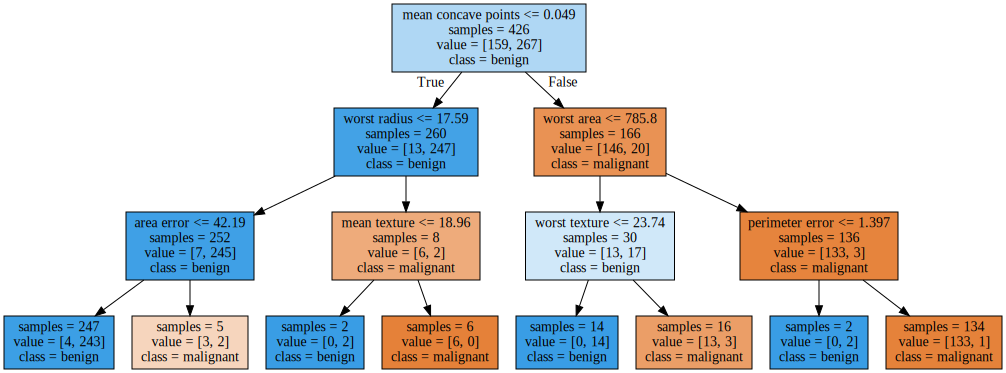

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',class_names=['malignant','benign'],feature_names = cancer.feature_names, impurity = False, filled = True)
import graphviz
with open ('tree.dot') as f:
  read = f.read()
graphviz.Source(read)

In [14]:
print("Feature Importance:\n{}".format(tree.feature_importances_))

Feature Importance:
[0.         0.01646729 0.         0.         0.         0.
 0.         0.76534    0.         0.         0.         0.
 0.02131182 0.01833724 0.         0.         0.         0.
 0.         0.         0.04440069 0.05411334 0.         0.08002962
 0.         0.         0.         0.         0.         0.        ]


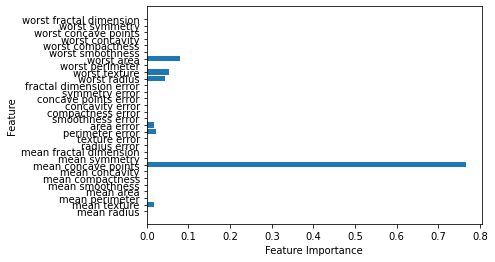

In [19]:
from matplotlib import pyplot as plt
import numpy as np
def plot_feature_importance(model):
  n_feature = cancer.data.shape[1]
  plt.barh(range(n_feature), model.feature_importances_,align = 'center')
  plt.yticks(np.arange(n_feature), cancer.feature_names)
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature')
plot_feature_importance(tree)